# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [2]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [3]:
# alpha function
def alpha_func(D, idx):
   cov_ = np.cov(D[['Sepal.Width','Sepal.Length']].loc[idx], rowvar=False)
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [4]:
alpha_func(df, range(100))

0.6189498510165619

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [5]:
#having in account only 100 observation like the test avobe, but we have 150 in the original file (that is why the value have a big difference).
rng = np.random.default_rng(0)
alpha_func(df, rng.choice(100, 100, replace=True))

0.6675354865158225

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

By calculating the mean of the Sepal.Length give us one poin estimate of the population, but this point may not capture all the variability associated with the estimate. Performing a boostrap analysis will provided aditional information about the variability, precission and potential biases of the estimate.  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [ ]:
# Add your code here to set the seed

#I added the seed to the function, other wise here I can write: seed = 0 and it will work the same way

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [10]:
bootstrap_values = []

#Defining funtion boot_SE
def boot_SE(D, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    n = D.shape[0]
    for i in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = alpha_func(D, idx)
        bootstrap_values.append(value)
        
    return np.std(np.array(bootstrap_values))

In [11]:
BST_SE = boot_SE(D=df[['Sepal.Width','Sepal.Length']])
BST_SE

0.03180510076860767

_(vi)_ What is the original mean value of `Sepal.Length`?

In [21]:
#Original mean value
sl_original_mean = np.mean(df['Sepal.Length'])
print("Original mean value of Sepal Length = {:.2f}".format(sl_original_mean))

Original mean value of Sepal Length = 5.84


Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

* The mean of the original value is equal to the boostraped samples mean.

* The range for the bootstrapped samples is relatively small at 0.39, indicating that the values are clustered closely around the mean.

In [13]:
boot_se_samples = []
#This functions return the std of the boostraped samples
def boot_SE(D, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    n = len(D)
    for i in range(B):
        df_bootstrap_sample = rng.choice(D, n, replace=True)
        mean_value =  df_bootstrap_sample.mean()
        boot_se_samples.append(mean_value)
        
    return np.std(np.array(boot_se_samples))

In [30]:
#boostraped samples standard deviation value
BST_SE_SL = boot_SE(D=df['Sepal.Length'])
print("Boostraped sample standar deviation = {:.2f}".format(BST_SE_SL))

#boostraped samples mean value
bst_mean = np.mean(boot_se_samples)
print("Boostraped sample mean = {:.2f}".format(bst_mean))

#Compare the mean against its original value
if sl_original_mean == bst_mean:
    print("The means are equal")
else:
    print("The means are different")

#bootstraped range
t_range = np.ptp(boot_se_samples) #difference between the maximum and minimum values in the boot_se_samples
print("The range for the bootstraped samples is small = {:.2f}".format(t_range))



Boostraped sample standar deviation = 0.07
Boostraped sample mean = 5.84
The means are equal
The range for the bootstraped samples is small = 0.39


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [42]:
# 95% confidence intervals, for the mean value of iris sepal length
#get the confidence interval
ci_lower, ci_upper  = np.percentile(np.array(boot_se_samples), [2.5, 97.5])

#Print the confidence interval
print("The confidence interval for the mean value of iris setal length is from {:.2f} to {:.2f}".format(ci_lower, ci_upper))

The confidence interval for the mean value of iris setal length is from 5.72 to 5.97


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

* The histogram provides a visual representation of the frequency of the boostraped sample's means for the boostraped sepal lengths, this figure shows an unimodal normal distribution and it is fairly symmetric with a center (higher frequency) at around 5.8.

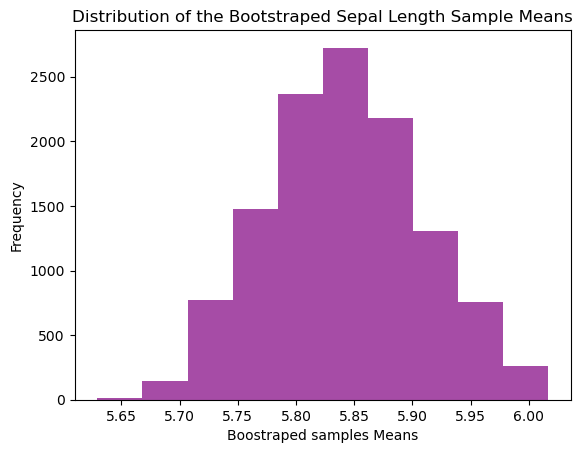

In [43]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(boot_se_samples,  color='purple', alpha= 0.7)

# Add a title
ax.set_title('Distribution of the Bootstraped Sepal Length Sample Means')

# Add a label to the x-axis
ax.set_xlabel('Boostraped samples Means')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

### Recommendation 


* There is consistency in the original mean and the boostrap mean for sepal length, this indicates that the average leght of the sepal leght of 5.84 is robust and reliable. 
* 95% confidence interval is 5.72 to 5.97. This suggest that there are 95% confidence that the true population mean lies within this range based on our sample data.

* Based on this analysis, I would recommend the shipping company to use the mean value of 5.84 to plan for the space allowment on the upcoming shipment.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
